## Task-1: Perform Image Compression Operations

In [1]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [4]:
image_path = 'wall.jpg'  
original_image = cv2.imread(image_path)

In [5]:
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

In [7]:
# Lossy Compression (JPEG)
lossy_image_path = 'lossy_image.jpg'
cv2.imwrite(lossy_image_path, original_image, [cv2.IMWRITE_JPEG_QUALITY, 50])  # Quality 50 for compression

# Lossless Compression (PNG)
lossless_image_path = 'lossless_image.png'
cv2.imwrite(lossless_image_path, original_image, [cv2.IMWRITE_PNG_COMPRESSION, 9])  # Max compression for PNG

lossy_image = Image.open(lossy_image_path)
lossless_image = Image.open(lossless_image_path)

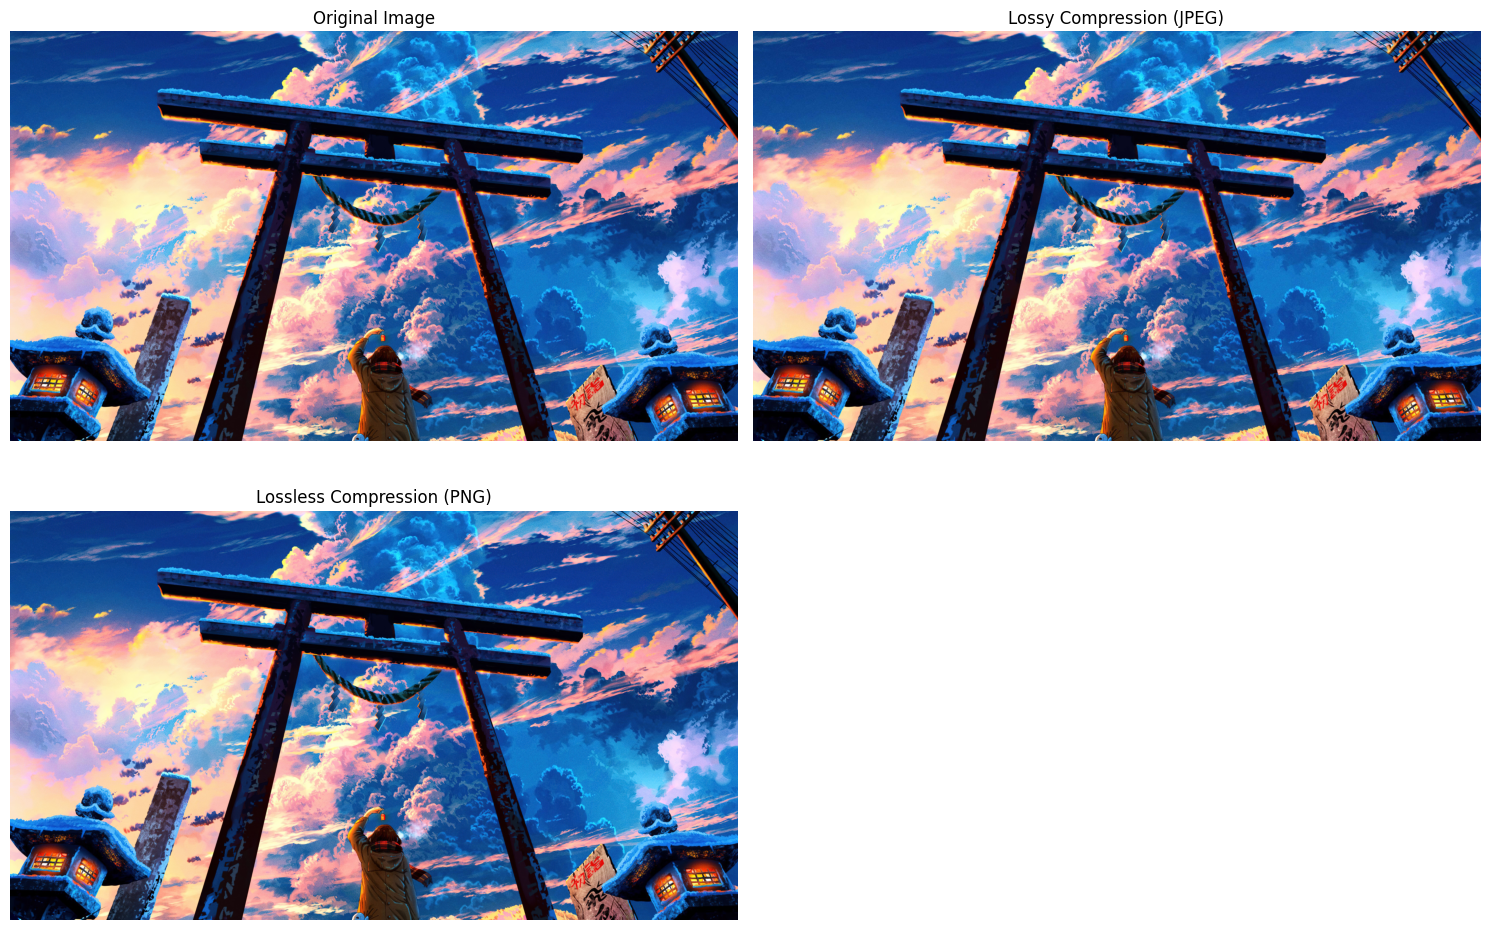

In [10]:
plt.figure(figsize=(15, 10))

# Original Image
plt.subplot(2, 2, 1)
plt.imshow(original_image_rgb)
plt.title("Original Image")
plt.axis('off')

# Lossy Compressed Image (JPEG)
plt.subplot(2, 2, 2)
plt.imshow(lossy_image)
plt.title("Lossy Compression (JPEG)")
plt.axis('off')

# Lossless Compressed Image (PNG)
plt.subplot(2, 2, 3)
plt.imshow(lossless_image)
plt.title("Lossless Compression (PNG)")
plt.axis('off')

plt.tight_layout()
plt.show()

## Task-2: Apply Convolutional Neural Networks (CNN)

### Part 1: Train CNN on the MNIST Dataset

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt




In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape and normalize the dataset
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))  

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


c:\Users\rishu\miniconda3\envs\venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=128)


Epoch 1/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8606 - loss: 0.4804 - val_accuracy: 0.9840 - val_loss: 0.0556
Epoch 2/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9833 - loss: 0.0566 - val_accuracy: 0.9861 - val_loss: 0.0409
Epoch 3/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9889 - loss: 0.0389 - val_accuracy: 0.9887 - val_loss: 0.0303
Epoch 4/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9912 - loss: 0.0293 - val_accuracy: 0.9891 - val_loss: 0.0317
Epoch 5/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9927 - loss: 0.0235 - val_accuracy: 0.9901 - val_loss: 0.0306
Epoch 6/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9939 - loss: 0.0179 - val_accuracy: 0.9895 - val_loss: 0.0310
Epoch 7/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9960 - loss: 0.0138 - val_accuracy: 0.9910 - val_loss: 0.0289
Epoch 8/50
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9970 - loss: 0.0104 - val_accu

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


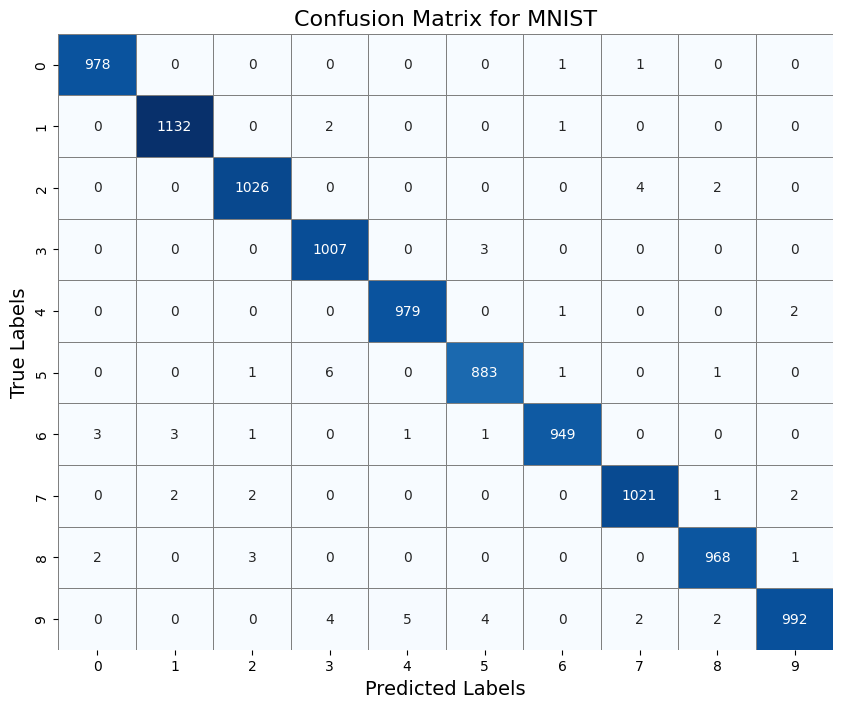

Classification Report:
               precision    recall  f1-score   support

           0     0.9949    0.9980    0.9964       980
           1     0.9956    0.9974    0.9965      1135
           2     0.9932    0.9942    0.9937      1032
           3     0.9882    0.9970    0.9926      1010
           4     0.9939    0.9969    0.9954       982
           5     0.9910    0.9899    0.9905       892
           6     0.9958    0.9906    0.9932       958
           7     0.9932    0.9932    0.9932      1028
           8     0.9938    0.9938    0.9938       974
           9     0.9950    0.9832    0.9890      1009

    accuracy                         0.9935     10000
   macro avg     0.9935    0.9934    0.9934     10000
weighted avg     0.9935    0.9935    0.9935     10000

Accuracy: 99.35%


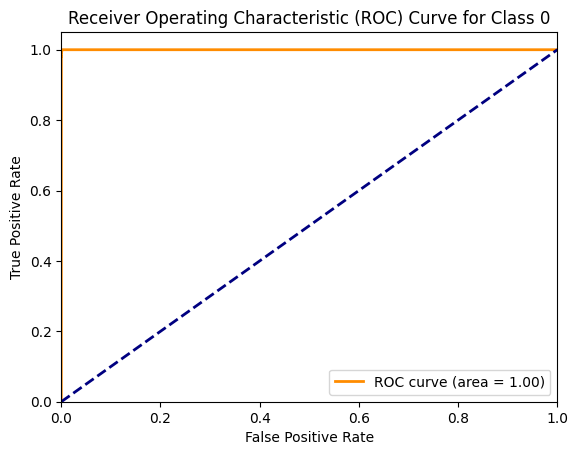

Overall AUC Score: 0.9999


In [15]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, confusion_matrix
import numpy as np
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# 1. Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')

plt.title('Confusion Matrix for MNIST', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

# 2. Classification Report 
class_report = classification_report(y_true, y_pred_classes, digits=4)
print("Classification Report:\n", class_report)

# 3. Accuracy
accuracy = np.sum(y_true == y_pred_classes) / len(y_true)
print(f"Accuracy: {accuracy * 100:.2f}%")

# 4. ROC and AUC (one-vs-all for multi-class classification)
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):  
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC Curve for class '0' (you can modify this for other classes)
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc[0]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Class 0')
plt.legend(loc="lower right")
plt.show()

auc_score = roc_auc_score(y_test, y_pred, average="macro")
print(f"Overall AUC Score: {auc_score:.4f}")


### Part 2: Train CNN on the CIFAR-10 Dataset

In [35]:
from keras.datasets import cifar10
from tensorflow import keras
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [36]:
def build_cifar10_model():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_cifar10_model()



In [37]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=128)


Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.3678 - loss: 1.7448 - val_accuracy: 0.5518 - val_loss: 1.2542
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.5734 - loss: 1.2105 - val_accuracy: 0.6164 - val_loss: 1.1078
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6225 - loss: 1.0721 - val_accuracy: 0.6067 - val_loss: 1.1207
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.6584 - loss: 0.9828 - val_accuracy: 0.6603 - val_loss: 0.9869
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.6845 - loss: 0.9116 - val_accuracy: 0.6519 - val_loss: 0.9868
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7074 - loss: 0.8407 - val_accuracy: 0.6861 - val_loss: 0.9090
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.7309 - loss: 0.7818 - val_accuracy: 0.6897 - val_loss: 0.9063
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.7459 - loss: 0.7289 - val_accu

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


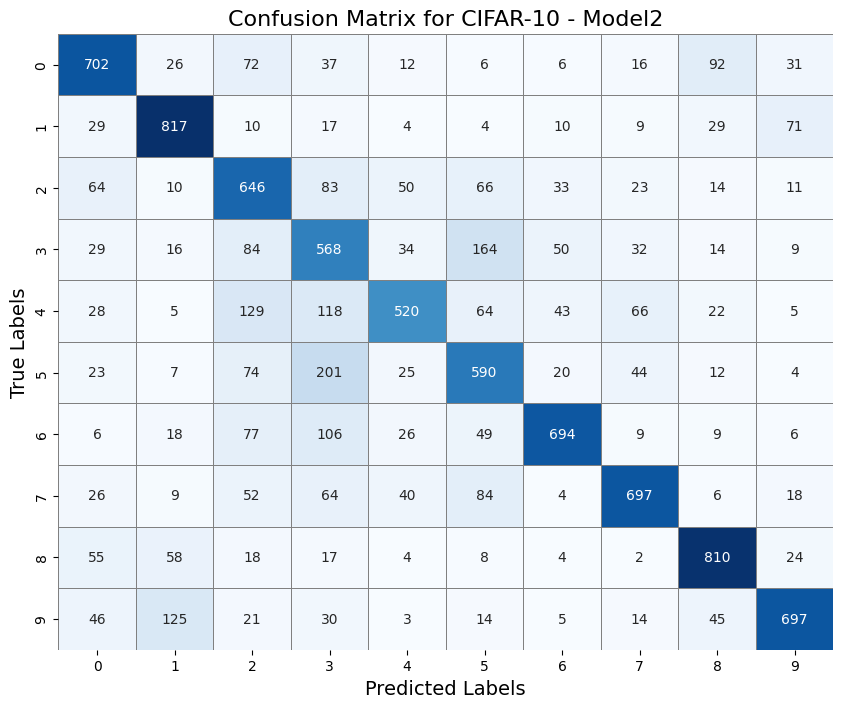

Classification Report:
               precision    recall  f1-score   support

           0     0.6964    0.7020    0.6992      1000
           1     0.7489    0.8170    0.7814      1000
           2     0.5461    0.6460    0.5918      1000
           3     0.4577    0.5680    0.5069      1000
           4     0.7242    0.5200    0.6054      1000
           5     0.5624    0.5900    0.5759      1000
           6     0.7986    0.6940    0.7426      1000
           7     0.7643    0.6970    0.7291      1000
           8     0.7692    0.8100    0.7891      1000
           9     0.7957    0.6970    0.7431      1000

    accuracy                         0.6741     10000
   macro avg     0.6863    0.6741    0.6765     10000
weighted avg     0.6863    0.6741    0.6765     10000

Accuracy: 67.41%


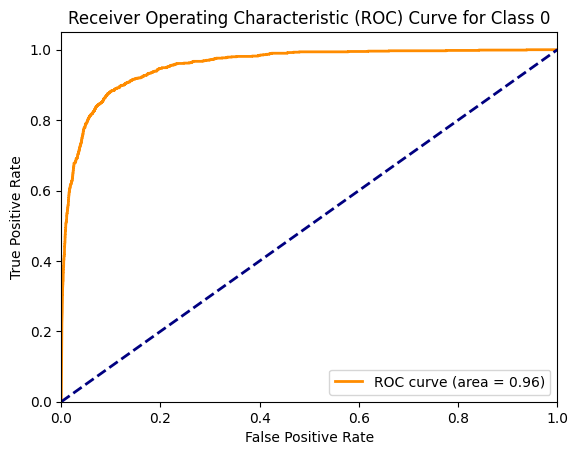

Overall AUC Score: 0.9437


In [39]:
# Predict on the test set
y_pred2 = model.predict(x_test)
y_pred_classes2 = np.argmax(y_pred2, axis=1)
y_true2 = np.argmax(y_test, axis=1)

# 1. Confusion Matrix
conf_matrix2 = confusion_matrix(y_true2, y_pred_classes2)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix2, annot=True, fmt='g', cmap='Blues', cbar=False, linewidths=0.5, linecolor='gray')

plt.title('Confusion Matrix for CIFAR-10 - Model2', fontsize=16)
plt.xlabel('Predicted Labels', fontsize=14)
plt.ylabel('True Labels', fontsize=14)
plt.show()

# 2. Classification Report (includes Precision, Recall, F1-score)
class_report2 = classification_report(y_true2, y_pred_classes2, digits=4)
print("Classification Report:\n", class_report2)

# 3. Accuracy
accuracy2 = np.sum(y_true2 == y_pred_classes2) / len(y_true2)
print(f"Accuracy: {accuracy2 * 100:.2f}%")

# 4. ROC and AUC (one-vs-all for multi-class classification)
fpr2 = dict()
tpr2 = dict()
roc_auc2 = dict()

for i in range(10):  # 10 classes for CIFAR-10
    fpr2[i], tpr2[i], _ = roc_curve(y_test[:, i], y_pred2[:, i])
    roc_auc2[i] = auc(fpr2[i], tpr2[i])

# Plot ROC Curve for class '0' (you can modify this for other classes)
plt.figure()
plt.plot(fpr2[0], tpr2[0], color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc2[0]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Class 0')
plt.legend(loc="lower right")
plt.show()

# Overall AUC Score
auc_score2 = roc_auc_score(y_test, y_pred2, average="macro")
print(f"Overall AUC Score: {auc_score2:.4f}")
